Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

#### Objective

* Explore and visualize the dataset.
* Build a linear regression model to predict the prices of used cars.
* Generate a set of insights and recommendations that will help the business.

#### Data Dictionary 

* S.No. : Serial Number
* Name : Name of the car which includes Brand name and Model name
* Location : The location in which the car is being sold or is available for purchase Cities
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner : Type of ownership
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
* Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Load the give data set and perform the initial observations

In [2]:
df_orig = pd.read_csv("used_cars_data.csv")
df = df_orig.copy() # creating a working copy, so that I dont have to reload when something down goes wrong. 

In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 7253 rows and 14 columns.


In [4]:
# Taking random sample to see how the data are recorded
np.random.seed(1)
df.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [5]:
df.describe(include='all')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,NaN,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,63.71 Lakh,NaN
freq,NaN,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,3626.000000,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,2093.905084,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,0.000000,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1813.000000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3626.000000,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,5439.000000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Observations from the random sample: 
* Looks like name field has Brand and the model number
* Data with units are observed in the milege, engine and power and those needs to converted to their respective datatype. 
* New_price in lakhs and Price are in the decimal unit, need to conver to actual numbers. 
* I think we need all the columns here for the analysis. 
* There are 5 Fuel_type, 2 Transmission and 4 types of Owner observed and this can be categorical variable.

### so data preprocessing has to be done on these fields. 
* Serial number (S.No) column can be removed since it is not going to make any use in the analysis. But i think can used as for joinging later on. 
* From the sample data, only New Price has more missing values. So will look into this one later part of the notebook. 

In [7]:
# dropping S.No column from the dataset
df.drop(['S.No.'], axis=1, inplace=True)

### Find duplicate records and drop the duplicates just keeping first/last

In [8]:
# to get total duplicated records
df.duplicated().sum() 

1

#### but if i remove the Sl.No. column from the dataset, there is one duplicate and that can be removed used the following code 

* duplicatedRow=df[df.duplicated(keep=False)] 
* duplicatedRow

In [9]:
duplicatedRow=df[df.duplicated(keep=False)]
duplicatedRow

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


In [10]:
#drop the duplicate row just keeping one
df = df.drop_duplicates(keep='first')

In [11]:
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3149,Mahindra XUV500 W8 2WD,Coimbatore,2013,130790,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,9.24
2206,Hyundai i20 1.2 Era,Kolkata,2015,35000,Petrol,Manual,First,17.0 kmpl,1197 CC,80 bhp,5.0,NaN,3.40
2262,Toyota Etios GD,Bangalore,2012,58253,Diesel,Manual,Second,23.59 kmpl,1364 CC,null bhp,5.0,NaN,4.45
6706,Maruti Swift Dzire VXi,Chennai,2012,158000,Petrol,Manual,First,17.5 kmpl,1298 CC,85.8 bhp,5.0,NaN,NaN
5862,Toyota Etios G,Jaipur,2013,67000,Petrol,Manual,Second,16.78 kmpl,1496 CC,88.73 bhp,5.0,NaN,4.05
973,Maruti Wagon R LXI,Delhi,2007,65000,Petrol,Manual,Second,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,1.25
4510,BMW 3 Series 320d Sport Line,Mumbai,2014,23000,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.0,NaN,19.90
4506,Honda Amaze S i-Vtech,Jaipur,2016,6714,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,4.75
3705,Mercedes-Benz GLC 220d 4MATIC Style,Coimbatore,2019,29311,Diesel,Automatic,First,17.9 kmpl,2143 CC,170 bhp,5.0,64.57 Lakh,50.97
3950,Toyota Corolla Altis VL,Delhi,2010,60000,Petrol,Automatic,Second,14.53 kmpl,1798 CC,138.1 bhp,5.0,NaN,4.65


Cleaning white spaces in the data

In [12]:
for colname in df.columns[df.dtypes == 'object']: 
    df[colname] = df[colname].str.strip()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7206 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.2+ KB


# Processing Columns
First clean the data and fill the NaN values using key information from other columns

# Name column
I think the name column can be split up into Brand and model. Anything beyond that can be taken later.

In [14]:
# Based on the observation Brand name is entered first in the name value and followed by Model. 
# here i am going to split one level and make the name column into Manufacturer and Model columm. and drop the Name column. 
df[['Brand','Model']] = df.Name.str.split(" ",n=1,expand=True)

In [15]:
#df.drop(['Name'], axis=1, inplace=True)

In [16]:
df['Name'] = df['Name'].str.upper().str.strip()
df['Brand'] = df['Brand'].str.upper().str.strip()

In [17]:
df['Brand'].unique()

array(['MARUTI', 'HYUNDAI', 'HONDA', 'AUDI', 'NISSAN', 'TOYOTA',
       'VOLKSWAGEN', 'TATA', 'LAND', 'MITSUBISHI', 'RENAULT',
       'MERCEDES-BENZ', 'BMW', 'MAHINDRA', 'FORD', 'PORSCHE', 'DATSUN',
       'JAGUAR', 'VOLVO', 'CHEVROLET', 'SKODA', 'MINI', 'FIAT', 'JEEP',
       'SMART', 'AMBASSADOR', 'ISUZU', 'FORCE', 'BENTLEY', 'LAMBORGHINI',
       'HINDUSTAN', 'OPELCORSA'], dtype=object)

In [18]:
# this one is just get the base model of the cars. there where some 2000 models with version, litre reference
# so to keep the data simple , i am going to keep the base model name.
# for example Swift desire , Swift VDI, Swift VLS will be grouped as SWift
df['Model'] = df['Model'].str.upper().str.strip()
df['Model']= df.Model.str.split().str.get(0) 

In [19]:
df['Model'].unique()

array(['WAGON', 'CRETA', 'JAZZ', 'ERTIGA', 'A4', 'EON', 'MICRA', 'INNOVA',
       'VENTO', 'INDICA', 'CIAZ', 'CITY', 'SWIFT', 'ROVER', 'PAJERO',
       'AMAZE', 'DUSTER', 'NEW', '3', 'S', 'A6', 'I20', 'ALTO', 'WRV',
       'COROLLA', 'SSANGYONG', 'VITARA', 'KUV', 'M-CLASS', 'POLO', 'NANO',
       'ELANTRA', 'XCENT', 'THAR', 'GRAND', 'KWID', 'I10', 'X-TRAIL',
       'ZEN', 'FIGO', 'C-CLASS', 'CAYENNE', 'XUV500', 'TERRANO', 'BRIO',
       'FIESTA', 'SANTRO', 'ZEST', 'RITZ', '5', 'FORTUNER', 'ECOSPORT',
       'VERNA', 'GO', 'OMNI', 'ETIOS', 'XF', 'EECO', 'CIVIC', 'V40', 'B',
       'SCORPIO', 'CR-V', 'SLC', '1', 'BEAT', 'RAPID', 'RS5', 'SUPERB',
       'X5', 'GLC', 'COUNTRYMAN', 'OPTRA', 'LODGY', 'E-CLASS', 'BALENO',
       'LAURA', 'NUVOSPORT', 'FABIA', 'INDIGO', 'Q3', 'OCTAVIA', 'A8',
       'VERITO', 'COOPER', 'SANTA', 'X1', 'ACCENT', 'TUCSON', 'GLE',
       'A-STAR', 'GRANDE', 'X3', 'Q7', 'JETTA', 'GLA', 'CELERIO', 'SUMO',
       'ACCORD', '6', 'MANZA', 'SPARK', 'CLUBMAN', 'TEANA', '

In [20]:
# this function is to get the total number of unique values in a column. 
def get_unique_count(column_name):
    cnt = 0 # variable to hold the count
    visited = [] # list to hold visited values
    # loop for counting the unique values in column
    for i in range(0, len(df[column_name])):
         if df[column_name][i] not in visited: 
            visited.append(df[column_name][i])
            cnt += 1
    return cnt

In [21]:
#print("Number of unique Brands",  get_unique_count('Brand'))
#print("Number of unique models", get_unique_count('Model'))

#### Convert the Mileage, Engine and Power Columns into numeric columns

In [22]:
# from the observation we see there mileage value has a space between value and units. So split and get the first part
# as the mileage
df['Mileage'] = df.Mileage.str.split().str.get(0) 
# from the observation we see there power value has a space between value and units. So split and get the first part
# as the power
df['Power'] = df.Power.str.split().str.get(0)
# from the observation we see there Engine value has a space between value and units. So split and get the first part
# as the Engine
df['Engine'] = df.Engine.str.split().str.get(0)

In [23]:
# Couple of value in POwer column are in the format null bhp. So replace 'null' string to np.nan for further cleaning
df['Power'] = df['Power'].replace('null',np.nan)

In [24]:
df['Mileage'] = df['Mileage'].astype('float')
df['Engine'] = df['Engine'].fillna(0).astype(int)
df['Power'] = df['Power'].astype('float')

In [25]:
df['Engine'] = df['Engine'].replace(0,np.nan)

In [26]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
count,7252,7252,7252.000000,7.252000e+03,7252,7252,7252,7250.000000,7206.000000,7077.000000,7199.000000,1006,6019.000000,7252,7252
unique,2017,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,625,NaN,32,218
top,MARUTI SWIFT DZIRE VDI,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,63.71 Lakh,NaN,MARUTI,SWIFT
freq,62,948,NaN,NaN,3852,5203,5951,NaN,NaN,NaN,NaN,6,NaN,1444,418
mean,NaN,NaN,2013.365830,5.869999e+04,NaN,NaN,NaN,18.141738,1616.590064,112.764474,5.279761,NaN,9.479468,NaN,NaN
std,NaN,NaN,3.254405,8.443351e+04,NaN,NaN,NaN,4.562492,595.324779,53.497297,0.811709,NaN,11.187917,NaN,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,NaN,0.440000,NaN,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,NaN,3.500000,NaN,NaN
50%,NaN,NaN,2014.000000,5.342900e+04,NaN,NaN,NaN,18.160000,1493.000000,94.000000,5.000000,NaN,5.640000,NaN,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.100000,5.000000,NaN,9.950000,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   float64
 8   Engine             7206 non-null   float64
 9   Power              7077 non-null   float64
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Brand              7252 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 906.5+ KB


## Cleaning up Price column, convert the values to numbers. 


In [28]:
df['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

We observe the New Price values has Lakh, Cr and null. So will cleanse the data accordingly. 

In [29]:
def price_cleanse(carprice):
    multiplier = 1
    if isinstance(carprice,str):
        if carprice.endswith('Cr'):
            multiplier = 10000000
        elif carprice.endswith('Lakh'):
            multiplier = 100000
        return float(carprice.replace('Cr','').replace('Lakh','').strip()) * multiplier
    else:
        return np.nan

In [30]:
df['New_Price'] = df['New_Price'].apply(price_cleanse)

In [31]:
df['Price'] = df['Price'] * 100000 # converting the value into real amount figures. decription say Price is in Lakhs

In [32]:
#treat the year as a categorical column
#df['Year']=df['Year'].astype(object)

In [33]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
count,7252,7252,7252.000000,7.252000e+03,7252,7252,7252,7250.000000,7206.000000,7077.000000,7199.000000,1.006000e+03,6.019000e+03,7252,7252
unique,2017,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,32,218
top,MARUTI SWIFT DZIRE VDI,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,MARUTI,SWIFT
freq,62,948,NaN,NaN,3852,5203,5951,NaN,NaN,NaN,NaN,NaN,NaN,1444,418
mean,NaN,NaN,2013.365830,5.869999e+04,NaN,NaN,NaN,18.141738,1616.590064,112.764474,5.279761,2.277969e+06,9.479468e+05,NaN,NaN
std,NaN,NaN,3.254405,8.443351e+04,NaN,NaN,NaN,4.562492,595.324779,53.497297,0.811709,2.775934e+06,1.118792e+06,NaN,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,3.910000e+05,4.400000e+04,NaN,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,7.885000e+05,3.500000e+05,NaN,NaN
50%,NaN,NaN,2014.000000,5.342900e+04,NaN,NaN,NaN,18.160000,1493.000000,94.000000,5.000000,1.157000e+06,5.640000e+05,NaN,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.100000,5.000000,2.604250e+06,9.950000e+05,NaN,NaN


In [34]:
df.isnull().sum().sort_values(ascending=False)

New_Price            6246
Price                1233
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Model                   0
Brand                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

## Observations so far.. 

* Looks like Mileage, Engine and Power has max is deviated from the most of the data. There seems to be an outlier. 
* Same applies to Kilometer driven, price. 
* Tough New Price has more missing values and the stats for the new price is even, it is safe to replace the mean value to the missing values. 
* For other fields I am thinking to use the exisiting values and fill the missing value. 



## Filling the missing values on Seats, Mileage, Engine, Power

In [35]:
# for seats i am filling the missing values as median value
df['Seats'] = df['Seats'].replace(0,np.nan) # cleaning up 0 value to the median
df['Seats'].fillna(df['Seats'].median(),inplace=True)

# for seats i am filling the missing values as median value
df['Engine'].fillna(df['Engine'].median(),inplace=True)

# for seats i am filling the missing values as median value
df['Mileage'] = df['Mileage'].replace(0,np.nan) # cleaning up 0 value to the median
df['Mileage'].fillna(df['Mileage'].median(),inplace=True)


# for seats i am filling the missing values as median value
df['Power'].fillna(df['Power'].median(),inplace=True)


### Handling Price is tricky,
* May be i am choosing a complex ways but fell it is an efficient way to handle the missing the data from already available values.
* to avoid filling the data with the median value. I will look the price of the car(mean) available earlier or not. If available get the mean of the price for that particular brand and model

In [36]:
# before this missing value for price is 1230
df['Year'] = df['Year'].astype(str) # Year is a categorical variable in this context
df['ukey'] = df[['Name', 'Year']].agg('-'.join, axis=1) # forming a unique key with concatinating year and name. 
priceMap_1 = df.dropna(subset=['Price']).drop_duplicates('ukey').set_index('ukey')['Price'] # This will return the price on Ukey
df['Price'] = df['Price'].fillna(df['ukey'].map(priceMap_1)) # this code will fill the missing price value in df with priceMap

In [37]:
# before this missing value for price is 551 and after below code it goes to 85
df['ukey1'] = df[['Brand', 'Model','Year']].agg('-'.join, axis=1) # forming a unique key with concatinating year and name. 
priceMap_2 = df.dropna(subset=['Price']).drop_duplicates('ukey1').set_index('ukey1')['Price'] # This will return the price on Ukey
df['Price'] = df['Price'].fillna(df['ukey1'].map(priceMap_2)) # this code will fill the missing price value in df with priceMap

In [38]:
# filling in the remaining missing value with median
df['Price'].fillna(df['Price'].median(),inplace=True)


In [39]:
# follow the same steps as done for price to the New Price. 
priceMap_3 = df.dropna(subset=['New_Price']).drop_duplicates('ukey').set_index('ukey')['New_Price'] # This will return the price on Ukey
df['New_Price'] = df['New_Price'].fillna(df['ukey'].map(priceMap_3)) 

In [40]:
# follow the same steps as done for price to the New Price. 
priceMap_4 = df.dropna(subset=['New_Price']).drop_duplicates('ukey1').set_index('ukey1')['New_Price'] # This will return the price on Ukey
df['New_Price'] = df['New_Price'].fillna(df['ukey1'].map(priceMap_4)) 

In [41]:
df['New_Price'].fillna(df['New_Price'].median(),inplace=True)

In [42]:
df['Year'] = df['Year'].astype(object) # Year is a categorical variable in this context

In [43]:
df.isnull().sum().sort_values(ascending=False)

ukey1                0
Mileage              0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
ukey                 0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
Model                0
Name                 0
dtype: int64

### Drop & delete the unnecessary columns and temprory df

In [44]:
df.drop(['Name', 'ukey', 'ukey1'], axis=1, inplace=True)
del priceMap_1, priceMap_2, priceMap_3, priceMap_4

### Model Column Cleanup. 
* there were too many models names observed so we get the threhold of model count and based on the threahold will keep the model and anything below the threshold can be set to others category. 

In [45]:
# get a copy of the working df
df_model = df.copy()
val_c = df_model.Model.value_counts()
val_c

SWIFT        418
CITY         317
I20          303
INNOVA       203
VERNA        200
            ... 
FUSION         1
BOXSTER        1
VENTURE        1
CLS-CLASS      1
GALLARDO       1
Name: Model, Length: 218, dtype: int64

In [46]:
# we take 100 as threshold
threshold = 100
val_c[val_c.values >= threshold]

SWIFT       418
CITY        317
I20         303
INNOVA      203
VERNA       200
GRAND       183
ALTO        183
I10         181
POLO        178
WAGON       178
XUV500      131
VENTO       129
AMAZE       127
NEW         119
FORTUNER    118
CRETA       118
ECOSPORT    117
FIGO        112
3           109
E-CLASS     108
Name: Model, dtype: int64

* 100 looks to be a good threshold.
* We will keep only those models that have more than 100 entries in the data, and the rest we will assign as 'Others'.


In [47]:
# list of tags
model_list = val_c[val_c.values >= threshold].index.tolist()
print("Model taken into consideration:", len(model_list), model_list)

Model taken into consideration: 20 ['SWIFT', 'CITY', 'I20', 'INNOVA', 'VERNA', 'GRAND', 'ALTO', 'I10', 'POLO', 'WAGON', 'XUV500', 'VENTO', 'AMAZE', 'NEW', 'FORTUNER', 'CRETA', 'ECOSPORT', 'FIGO', '3', 'E-CLASS']


In [48]:
# let us create a copy of our dataframe
df2 = df_model.copy()
df2.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
Model                0
dtype: int64

In [49]:
### Since EDA vizualtion is pending, i am gonna need model colum, so i will replace the model out of threhold with others
def model_cleanse(model):
    if model not in model_list:
        return 'Others'
    else:
        return model
    
df2['Model']= df2['Model'].apply(model_cleanse)


In [50]:
## Checking any null values, cuz in the v1 document had a null record
is_NaN = df2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df2[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price, Brand, Model]
Index: []


In [51]:
# get a copy of the working df
df_brand = df2.copy()
val_c = df_brand.Brand.value_counts()
val_c

MARUTI           1444
HYUNDAI          1340
HONDA             742
TOYOTA            507
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
NISSAN            117
LAND               67
JAGUAR             48
FIAT               38
MITSUBISHI         36
MINI               31
VOLVO              28
JEEP               19
PORSCHE            19
DATSUN             17
ISUZU               5
FORCE               3
BENTLEY             2
OPELCORSA           1
LAMBORGHINI         1
HINDUSTAN           1
SMART               1
AMBASSADOR          1
Name: Brand, dtype: int64

In [52]:
# we take 150 as threshold
threshold = 150
val_c[val_c.values >= threshold]

MARUTI           1444
HYUNDAI          1340
HONDA             742
TOYOTA            507
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
Name: Brand, dtype: int64

In [53]:
# list of tags
brand_list = val_c[val_c.values >= threshold].index.tolist()
print("Brand taken into consideration:", len(brand_list), brand_list)

Brand taken into consideration: 14 ['MARUTI', 'HYUNDAI', 'HONDA', 'TOYOTA', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'FORD', 'MAHINDRA', 'BMW', 'AUDI', 'TATA', 'SKODA', 'RENAULT', 'CHEVROLET']


In [54]:
### Since EDA vizualtion is pending, i am gonna need model colum, so i will replace the model out of threhold with others
def brand_cleanse(brand):
    if brand not in brand_list:
        return 'Others'
    else:
        return brand
    
df2['Brand']= df2['Brand'].apply(brand_cleanse)

In [55]:
val_c = df2.Brand.value_counts()
val_c

MARUTI           1444
HYUNDAI          1340
HONDA             742
TOYOTA            507
Others            435
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
Name: Brand, dtype: int64

In [56]:
df2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,474000.0,175000.0,MARUTI,WAGON
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1832000.0,1250000.0,HYUNDAI,CRETA
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,861000.0,450000.0,HONDA,Others
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1126000.0,600000.0,MARUTI,Others
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,5314000.0,1774000.0,AUDI,Others


Covert the Price values to the lakh denominations

In [57]:
df2['Price'] = df2['Price'] / 100000

In [58]:
df2['New_Price'] = df2['New_Price'] / 100000

In [59]:
#df2['Year'] = df2['Year'].astype(object) # Year is a categorical variable in this context

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   object 
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7252 non-null   float64
 7   Engine             7252 non-null   float64
 8   Power              7252 non-null   float64
 9   Seats              7252 non-null   float64
 10  New_Price          7252 non-null   float64
 11  Price              7252 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 849.8+ KB


### EDA 

# Univariate Analysis

In [61]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

 * most of the cars belong to 10 year old category
 * 2014 and 2015 make cars are being sold highly. 

## Observation by Seats

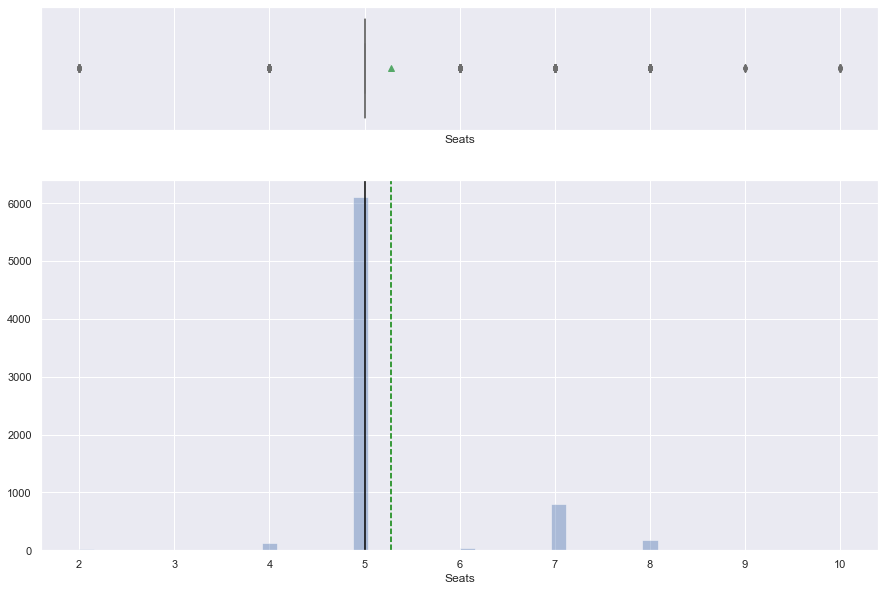

In [62]:
histogram_boxplot(df2["Seats"])

 Most of the cars has number of seats in the interquartile range. 5 seats

### Mileage

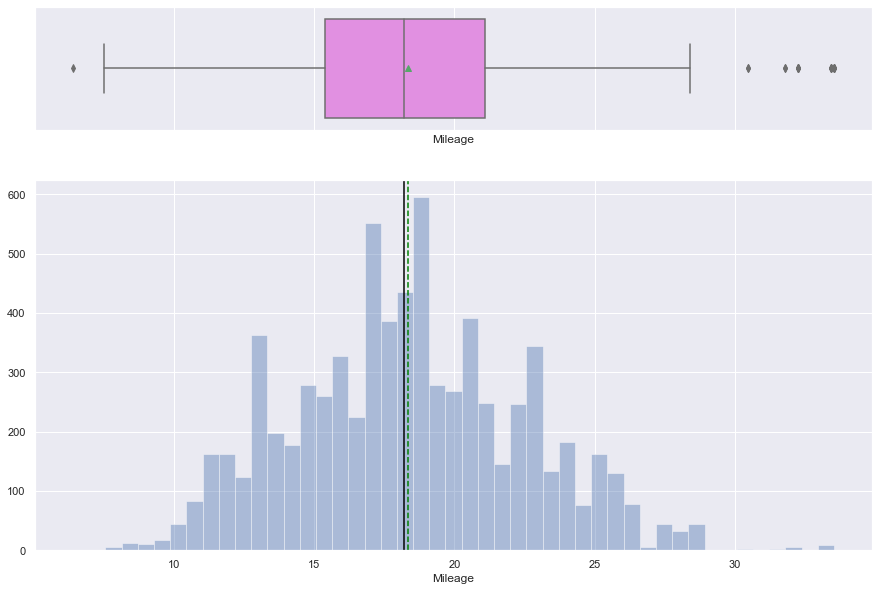

In [63]:
histogram_boxplot(df["Mileage"])

 * Mileage are close to normally distributed with some outliers

### Engine

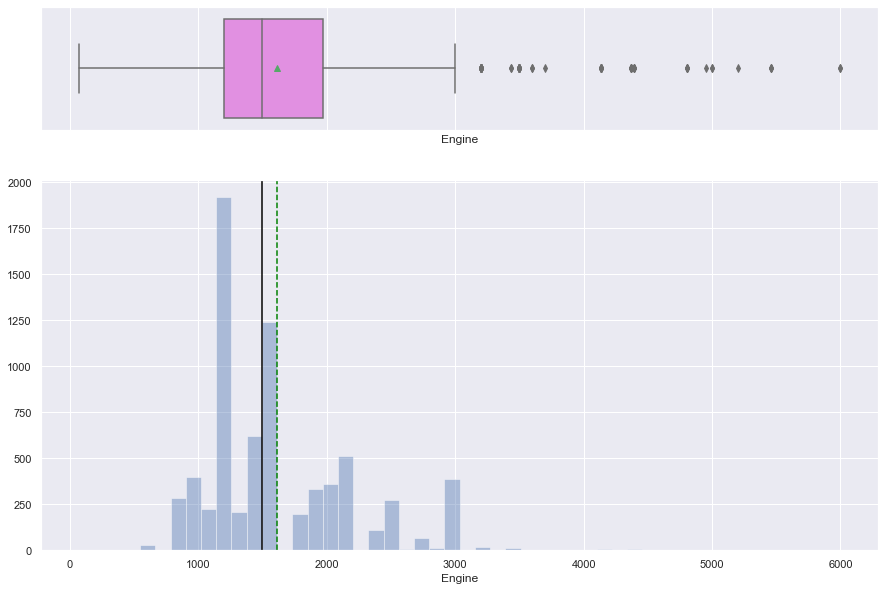

In [64]:
histogram_boxplot(df2["Engine"])

Distribution is right skewed with the median value of ~1500 CC .. there are outliers towards the maxium ends. which needs to worked out later

### Power

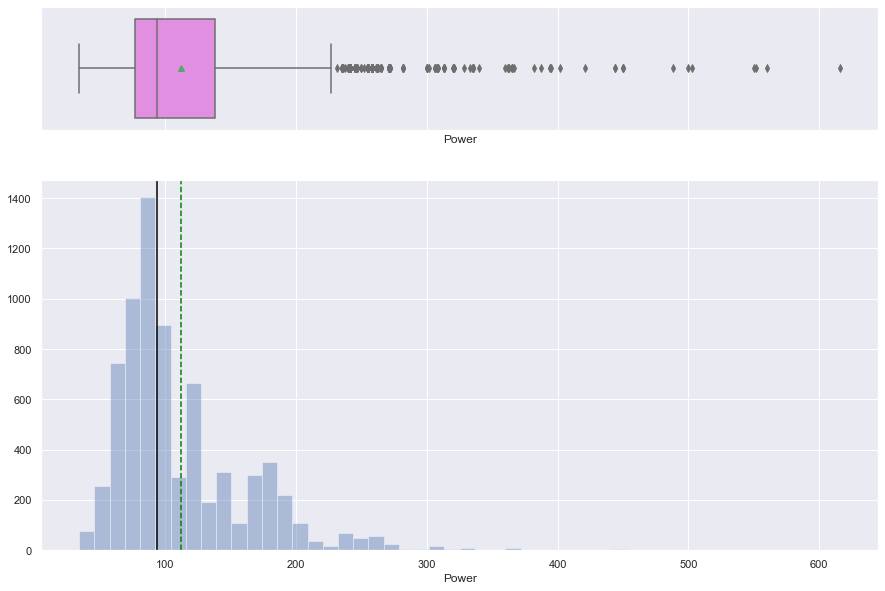

In [65]:
histogram_boxplot(df2["Power"])

* Distribution is right skewed with medain power less than 100 bhp

### Price

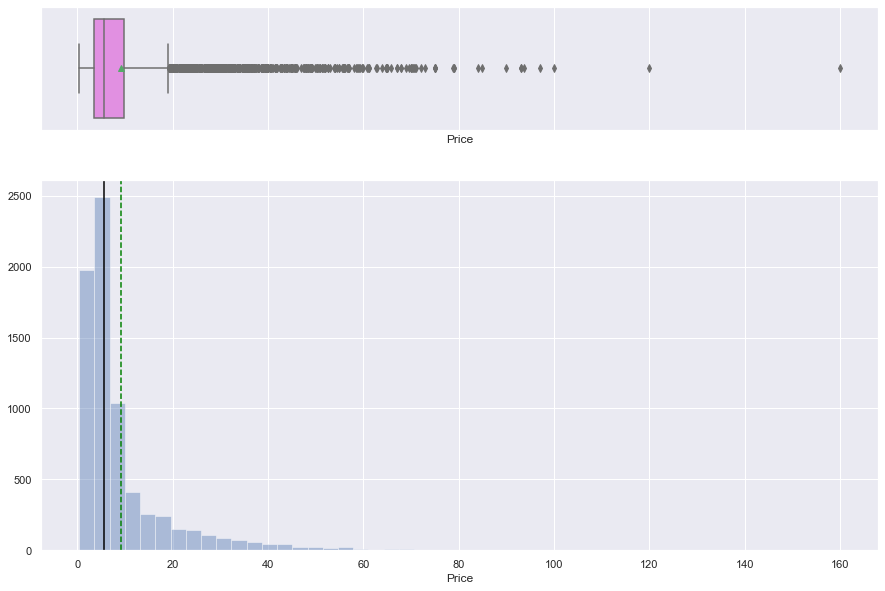

In [66]:
histogram_boxplot(df2["Price"])

 * Right skewed distribution with outliers.

### New Price

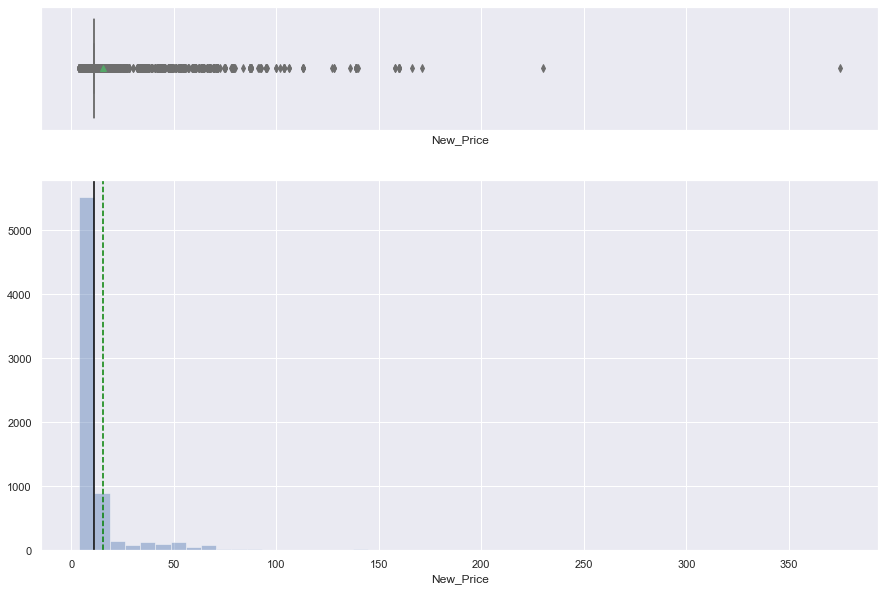

In [67]:
histogram_boxplot(df2["New_Price"])

 * Most of the cars with new price are in the median price range. Reason is misising values are filled based on the median

## Observation on Year


In [68]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

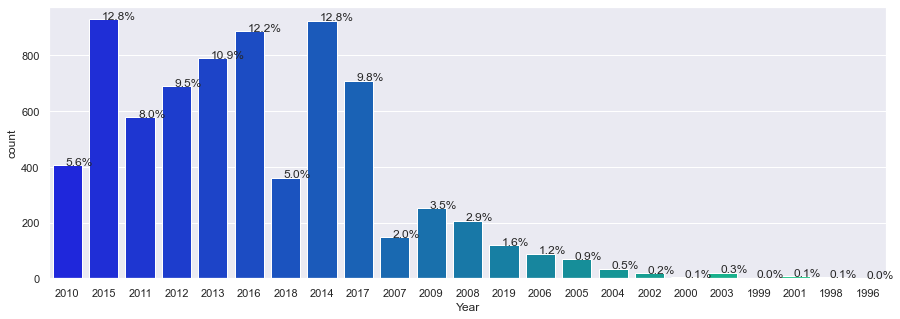

In [69]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Year"],palette='winter')
perc_on_bar(ax,df2["Year"])

## Observation on Fuel Type

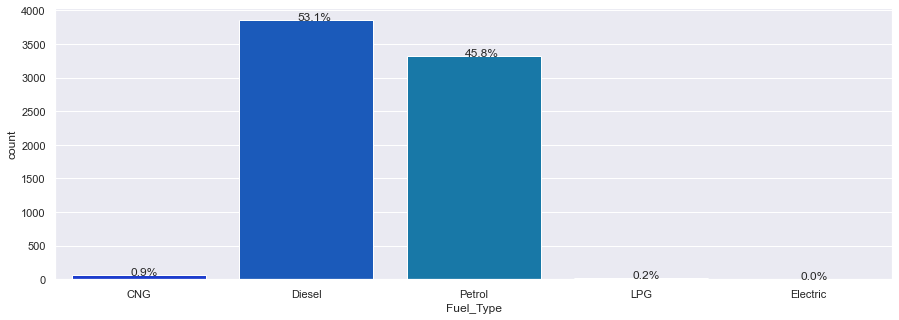

In [70]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Fuel_Type"],palette='winter')
perc_on_bar(ax,df2["Fuel_Type"])

* Diesel car are sold more than petrol cars
* Not many CNG, LPG or electric cars are sold

## Observation on Transmission


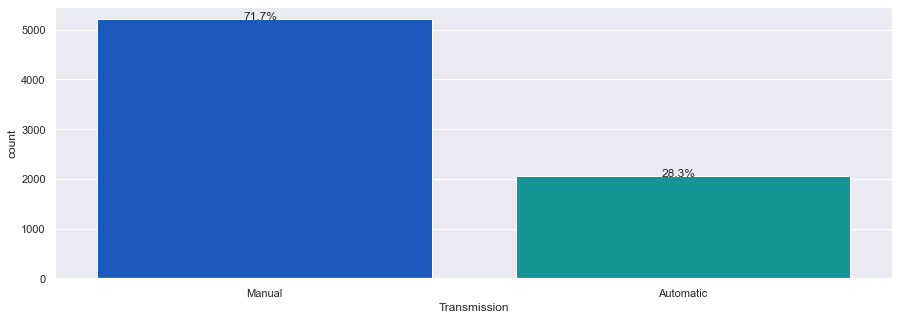

In [71]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Transmission"],palette='winter')
perc_on_bar(ax,df2["Transmission"])

Looks like more people preferred to buy Manual cars. 

### Observation on Owner_Type


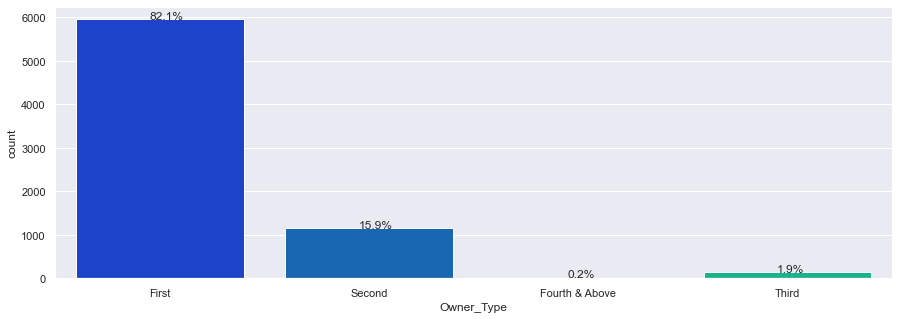

In [72]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Owner_Type"],palette='winter')
perc_on_bar(ax,df2["Owner_Type"])

* First hand car is what preferred by the majority of the buyers

## Observation on Brand


<AxesSubplot:>

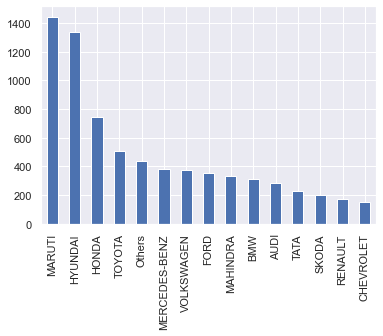

In [73]:
df2['Brand'].value_counts().plot(kind='bar')

 * Maruthi and Hyundai are the most preferred brand followed by Hondo & Toyota

## Observation on Models


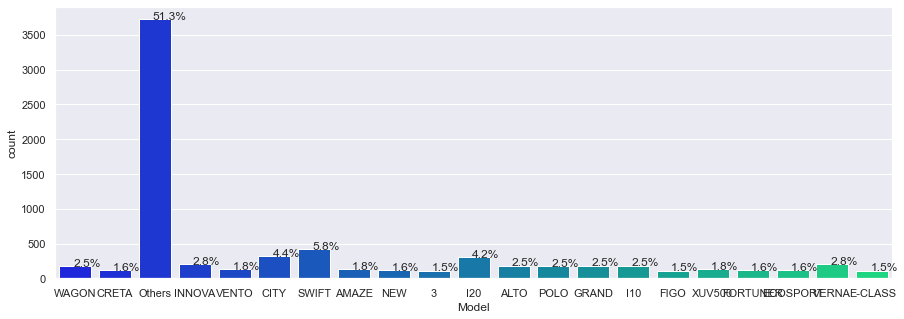

In [74]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Model"],palette='winter')
perc_on_bar(ax,df2["Model"])

* Swift is the most preferred model followed by I20, City model cars. 

## Observation on Location


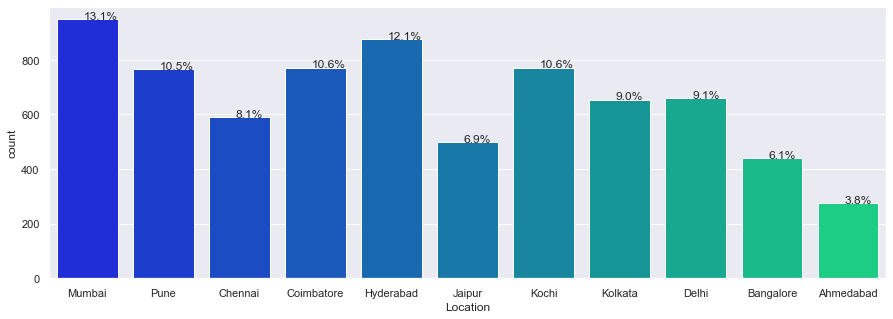

In [75]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Location"],palette='winter')
perc_on_bar(ax,df2["Location"])

There is not much i could infer using the location alone. 
Need to check this parameter in the bivariate analysis

## Bivariate Analysis

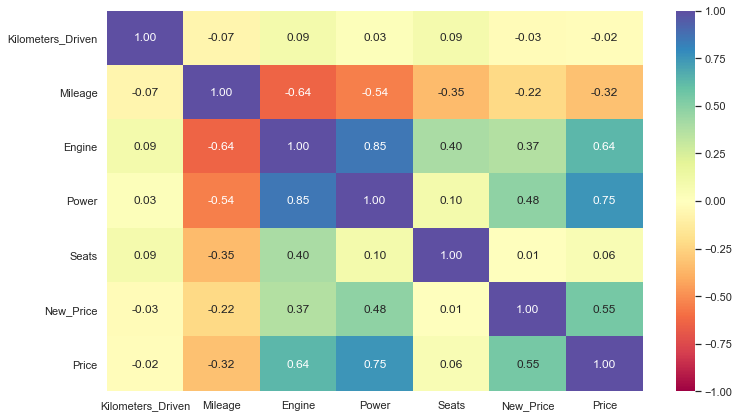

In [76]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Engine is highly correlated with Power
Kilometers driven has negative correlation between Year, Mileage, New-Price and Price. 
Mileage has negative correlation with Engine, Power, Seats is expected. But vs Price should be investigated further. 

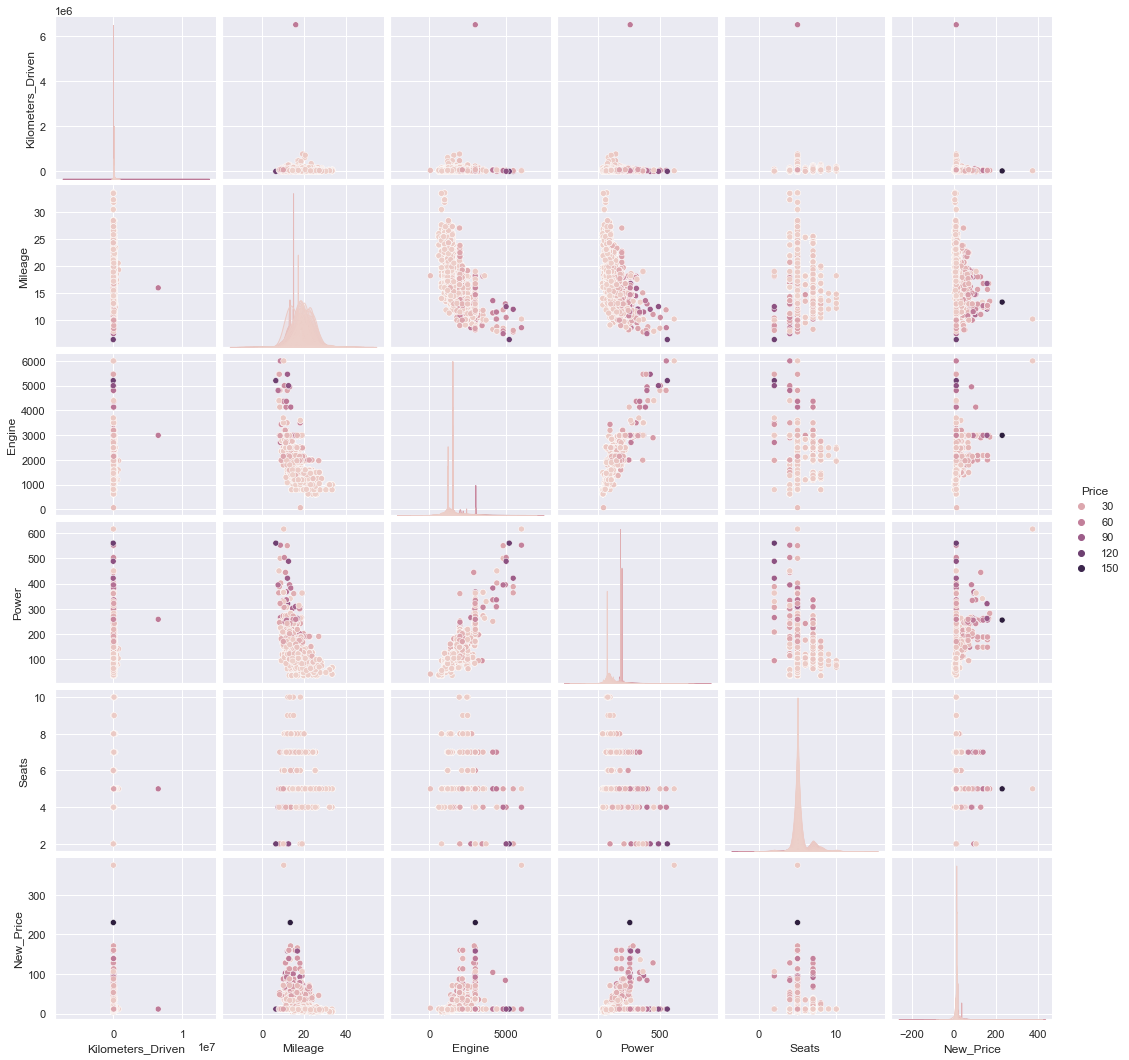

In [77]:
sns.pairplot(data=df2,hue="Price")
plt.show()

* The data visvualization indicates there are outliers in Kilometers_Driven, Mileage, Engine, Power and New Price;
* where Power (0.75) and Engine (0.64) are highly co-related


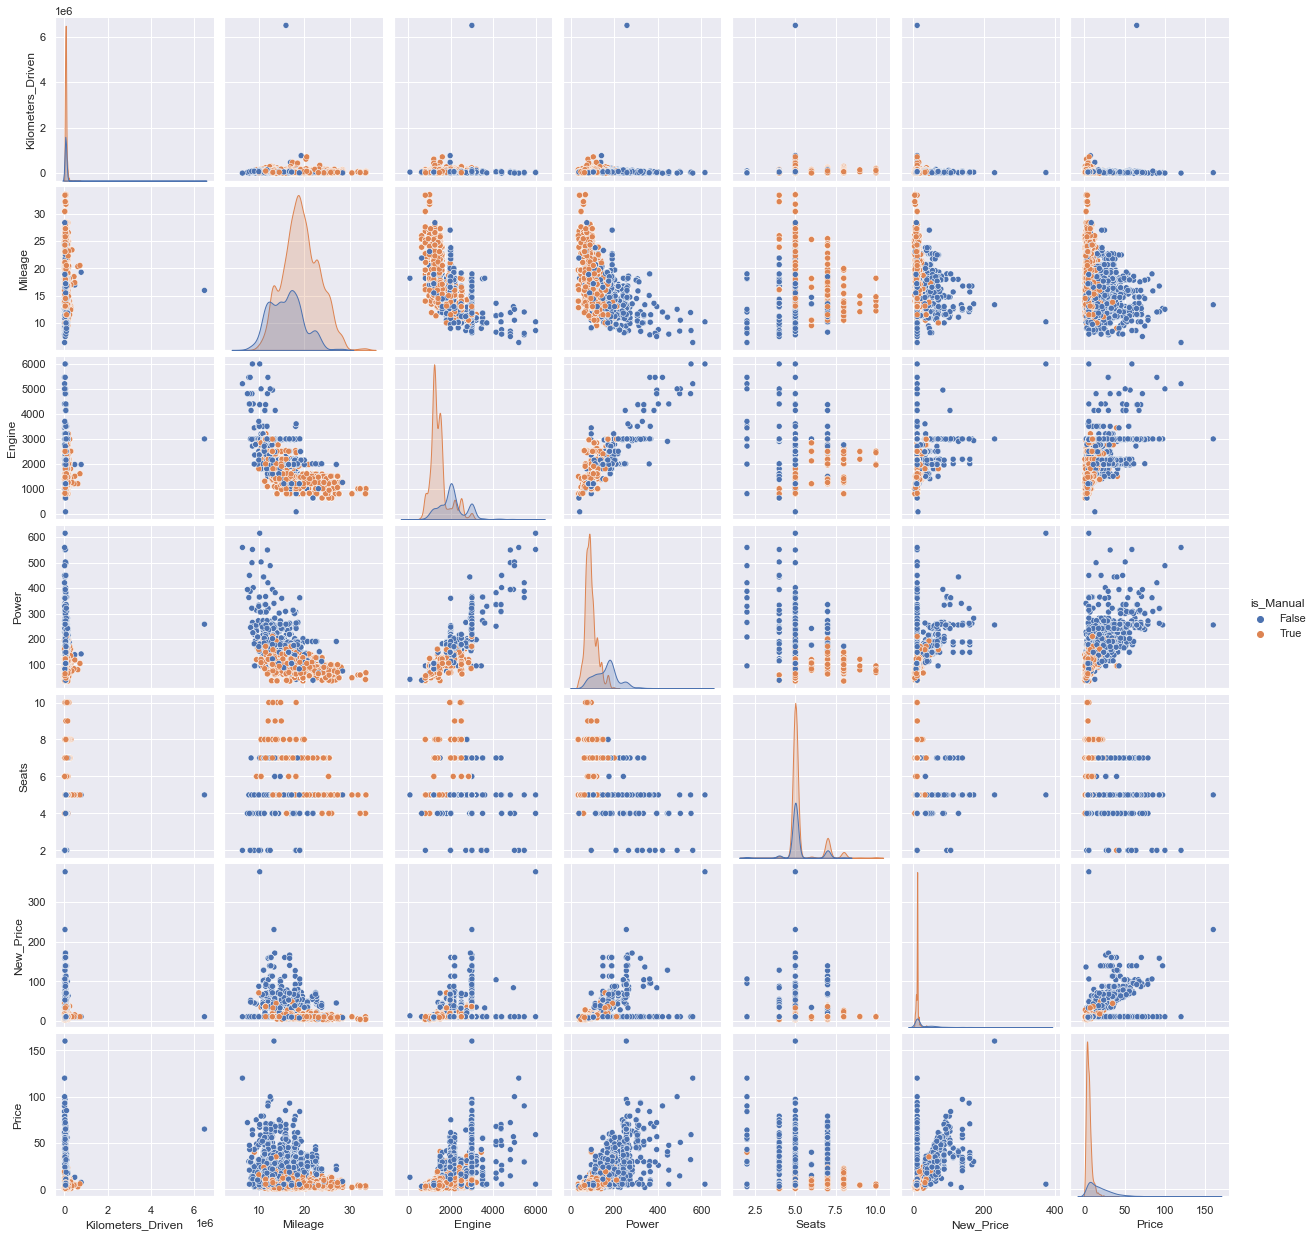

In [78]:
# Scatter plot to visualize the Transmission vs other paramters. 

df2['is_Manual'] = df2['Transmission'] == 'Manual'  # for hue
cols_to_exclude = ['Brand', 'Model', 'Year']
sns.pairplot(df2[[colname for colname in df2.columns if colname not in cols_to_exclude]], hue = 'is_Manual')
df2.drop(['is_Manual'], axis=1, inplace=True)

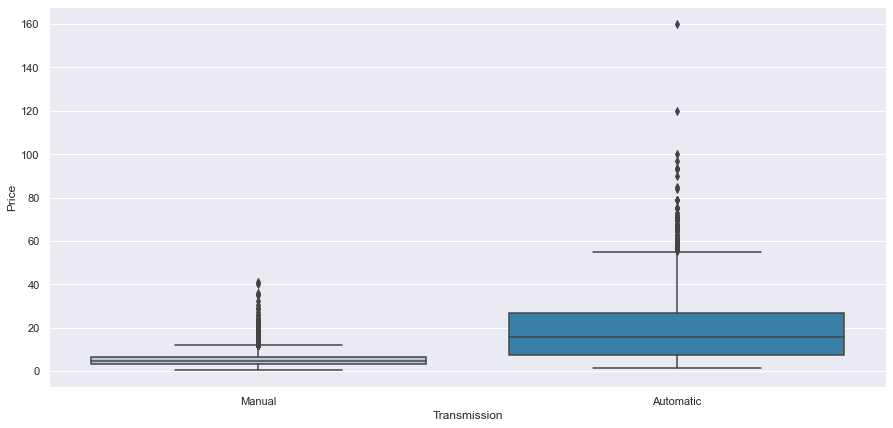

In [79]:
plt.figure(figsize=(15,7))
sns.boxplot(df2["Transmission"],df2["Price"],palette="PuBu")
plt.show()

Though the manual cars are sold more, Automatic cars are sold/ has better resale value than manual

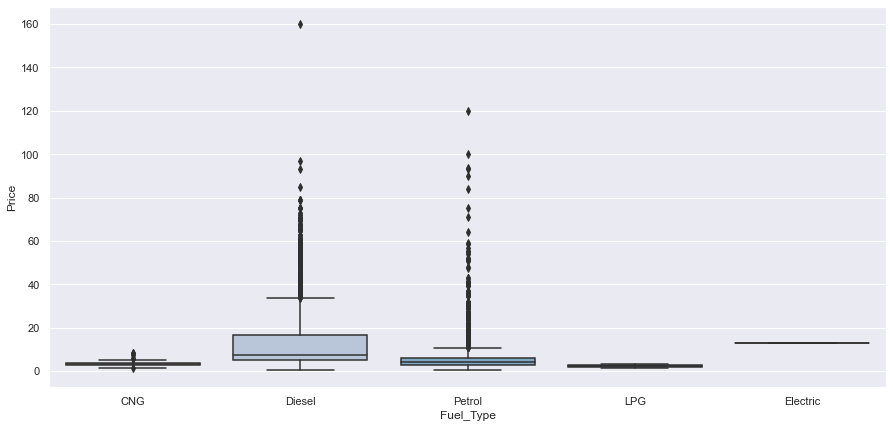

In [80]:
plt.figure(figsize=(15,7))
sns.boxplot(df2["Fuel_Type"],df2["Price"],palette="PuBu")
plt.show()

Average price of electric car is higher than other fuel type. but considering the little electric we cannot conclude this finding.It is evident that the diesel cars are sold more and contributes to price

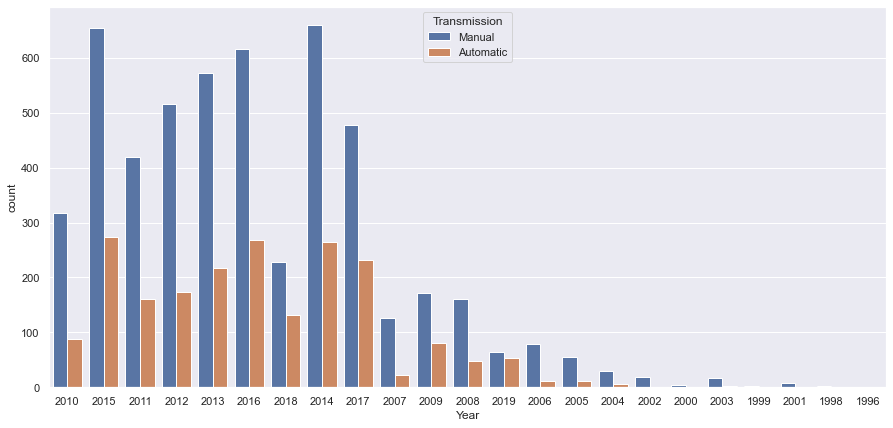

In [81]:
plt.figure(figsize=(15,7))
#sns.boxplot(df2["Year"],df2["Transmission"],palette="PuBu")
sns.countplot(df2.Year, hue=df2.Transmission)
plt.show()

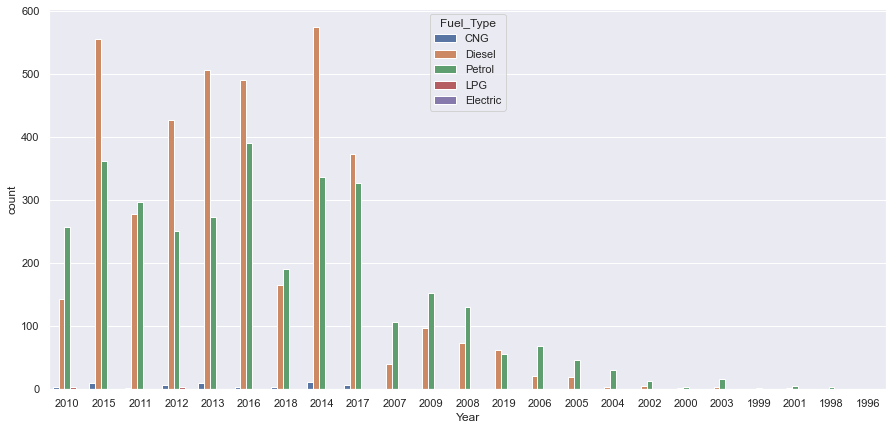

In [82]:
plt.figure(figsize=(15,7))
#sns.boxplot(df2["Year"],df2["Transmission"],palette="PuBu")
sns.countplot(df2.Year, hue=df2.Fuel_Type)
plt.show()

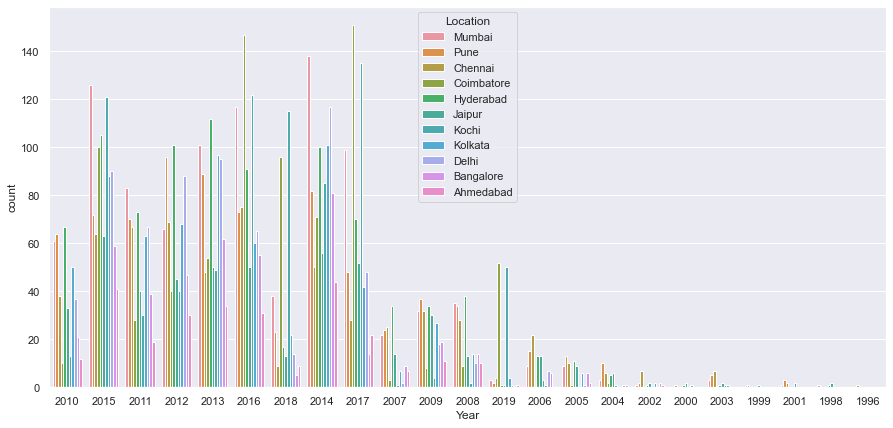

In [83]:
plt.figure(figsize=(15,7))
#sns.boxplot(df2["Year"],df2["Transmission"],palette="PuBu")
sns.countplot(df2.Year, hue=df2.Location)
plt.show()

Average car price is higher in the Coimbatore and Bangalore region. From this we can see more people have purchased used cars from Coimbatore and Bangalore. From the graph we can infer tier-2 cities sees increase(recent years) in the used car owners segments. 

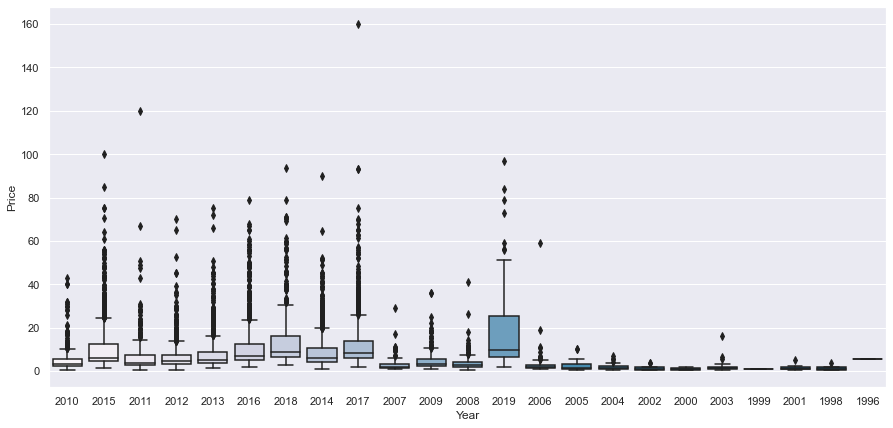

In [84]:
plt.figure(figsize=(15,7))
sns.boxplot(df2["Year"],df2["Price"],palette="PuBu")
plt.show()

It is evident that relatively new cars are sold at the better prices

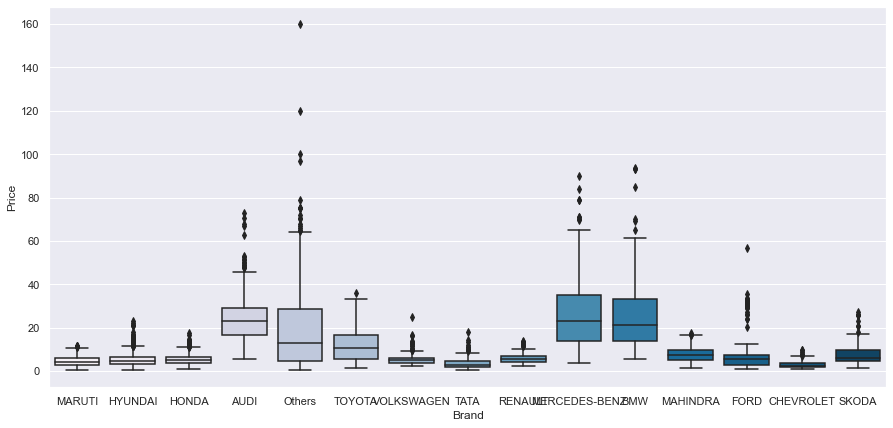

In [85]:
plt.figure(figsize=(15,7))
sns.boxplot(df2["Brand"],df2["Price"],palette="PuBu")
plt.show()

Maruthi being the most selled cars because the price is affordable . Also all the top 3 cars average price is under 10 lakhs hence we see the people buying such cars

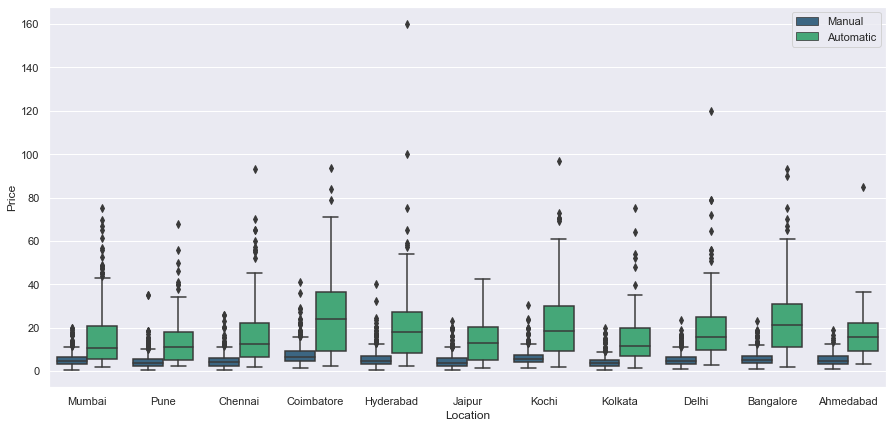

In [86]:
plt.figure(figsize=(15,7))
sns.boxplot(df2["Location"],df2["Price"],hue=df2["Transmission"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Across all the cities automatic cars sold at higher price than the manual cars.

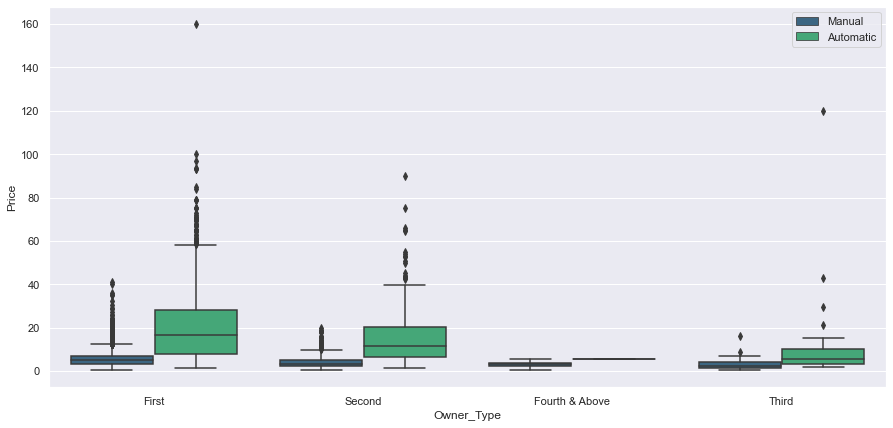

In [87]:
plt.figure(figsize=(15,7))
sns.boxplot(df2["Owner_Type"],df2["Price"],hue=df2["Transmission"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

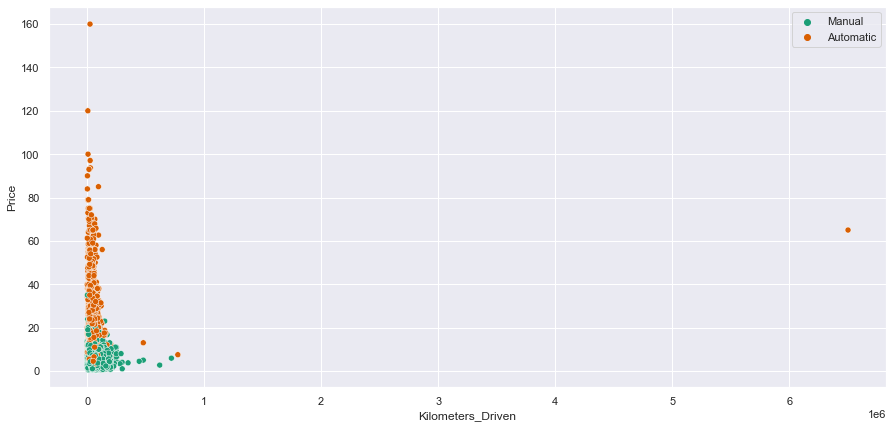

In [88]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2["Kilometers_Driven"],df2["Price"],hue=df2["Transmission"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Higher the Kilometer driven , cars sold at lower price

### Price vs Mileage vs Owner Type

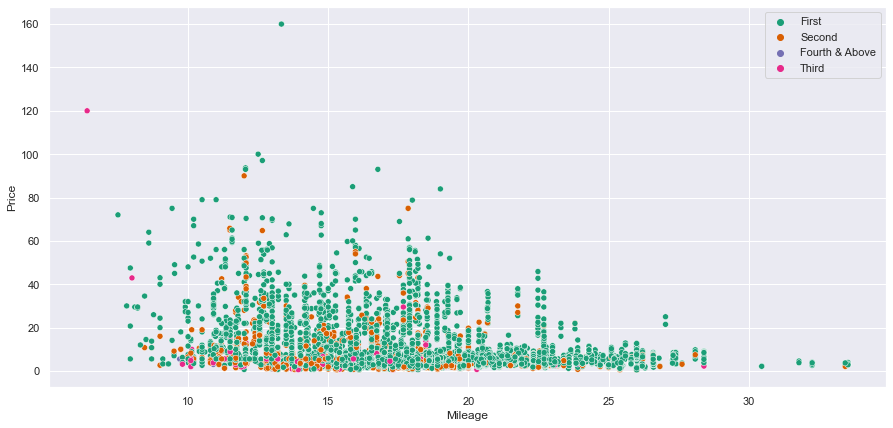

In [89]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2["Mileage"],df2["Price"],hue=df2["Owner_Type"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Most of the cars sold has mileage between 10 and 20. 

### Price vs Power vs Fuel_Type

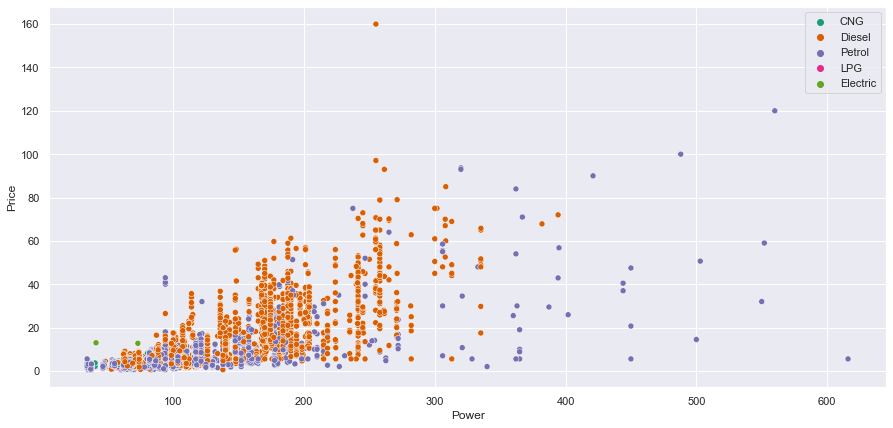

In [90]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2["Power"],df2["Price"],hue=df2["Fuel_Type"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Best priced cars have a mileage in the range of 14 - 17. Though CNG engines has better mileage still sold at lower prices. 
From this we can also infer that most econonical cars in terms of mileage is priced lower

### Price vs Engine vs Fuel_Type

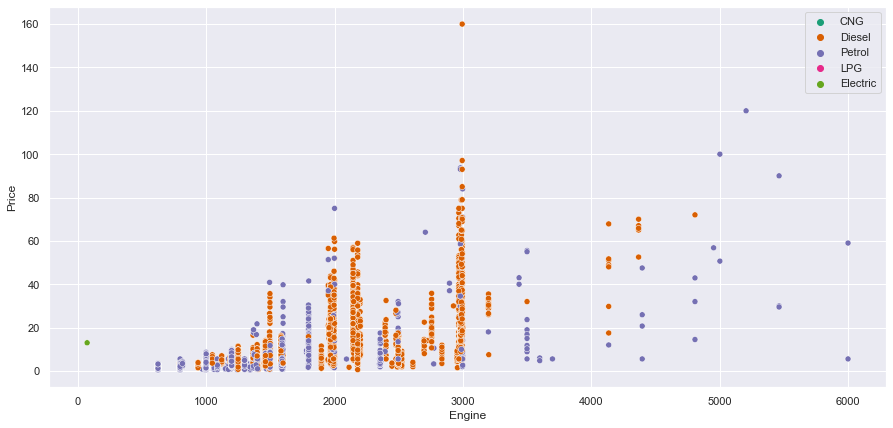

In [91]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2["Engine"],df2["Price"],hue=df2["Fuel_Type"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Higher power & engine capacity cars are sold at higher prices

### Analysis on Categorical Variables

In [92]:
data_categorical = df2[['Brand','Location','Year','Fuel_Type','Transmission','Owner_Type']]


In [93]:
## Not going to use the labelencoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()



data_categorical['Brand'] = label_encoder.fit_transform(data_categorical['Brand'])

data_categorical['Location'] = label_encoder.fit_transform(data_categorical['Location'])

data_categorical['Fuel_Type'] = label_encoder.fit_transform(data_categorical['Fuel_Type'])

data_categorical['Transmission'] = label_encoder.fit_transform(data_categorical['Transmission'])

data_categorical['Owner_Type'] = label_encoder.fit_transform(data_categorical['Owner_Type'])

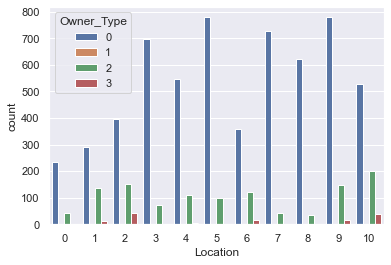

In [94]:
sns.countplot(x = data_categorical.Location, hue = data_categorical.Owner_Type)
plt.show()

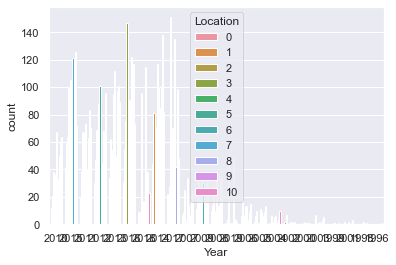

In [95]:
sns.countplot(x = data_categorical.Year, hue = data_categorical.Location)
plt.show()

### Outlier Detection

In [96]:
data_continous = df2[['Kilometers_Driven','Mileage','Engine','Power']]

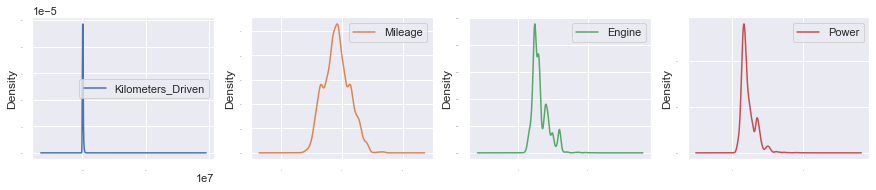

In [97]:
#Density Plot
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

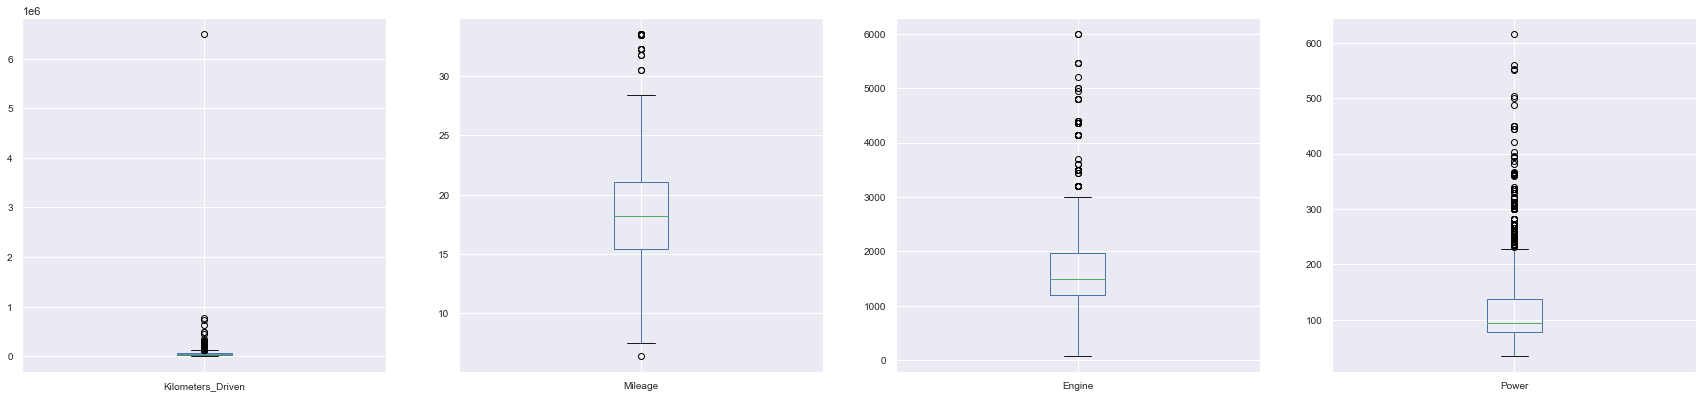

In [98]:
#Box_Plot
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

In [99]:
#Remove Outliers from  'Kilometers_Driven','Power','Engine','Mileage'
Q1 = data_continous.quantile(0.25)
Q2 = data_continous.quantile(0.5)
Q3 = data_continous.quantile(0.75)

IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

print("IQR : ",IQR)
print("")
print("Min : ",Min)
print("")
print("Q1 : ",Q1)
print("")
print("Q2 : ",Q2)
print("")
print("Q3 : ",Q3)
print("")
print("Max : ",Max)

IQR :  Kilometers_Driven    39000.00
Mileage                  5.70
Engine                 770.00
Power                   61.03
dtype: float64

Min :  Kilometers_Driven   -24500.000
Mileage                  6.850
Engine                  43.000
Power                  -14.545
dtype: float64

Q1 :  Kilometers_Driven    34000.0
Mileage                 15.4
Engine                1198.0
Power                   77.0
Name: 0.25, dtype: float64

Q2 :  Kilometers_Driven    53429.0
Mileage                 18.2
Engine                1493.0
Power                   94.0
Name: 0.5, dtype: float64

Q3 :  Kilometers_Driven    73000.00
Mileage                 21.10
Engine                1968.00
Power                  138.03
Name: 0.75, dtype: float64

Max :  Kilometers_Driven    131500.000
Mileage                  29.650
Engine                 3123.000
Power                   229.575
dtype: float64


In [100]:
#Check shape before removal of outliers
df2.shape

(7252, 14)

In [101]:
#Take data backup before removal of outliers
df3=df2.copy()

In [102]:
#Remove Outliers
df3 = df3[~((df3[['Kilometers_Driven','Power','Engine','Mileage']] < Min) 
                          | (df3[['Kilometers_Driven','Power','Engine','Mileage']] > Max)).any(axis=1)]

In [103]:
#Check shape after removal of outliers
df3.shape

(6688, 14)

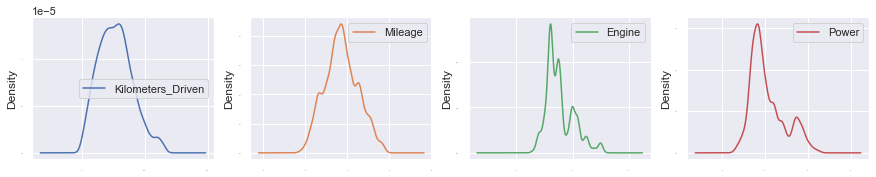

In [104]:
#Density Plot post outlier removal
data_continous = df3[['Kilometers_Driven','Mileage','Engine','Power']]
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

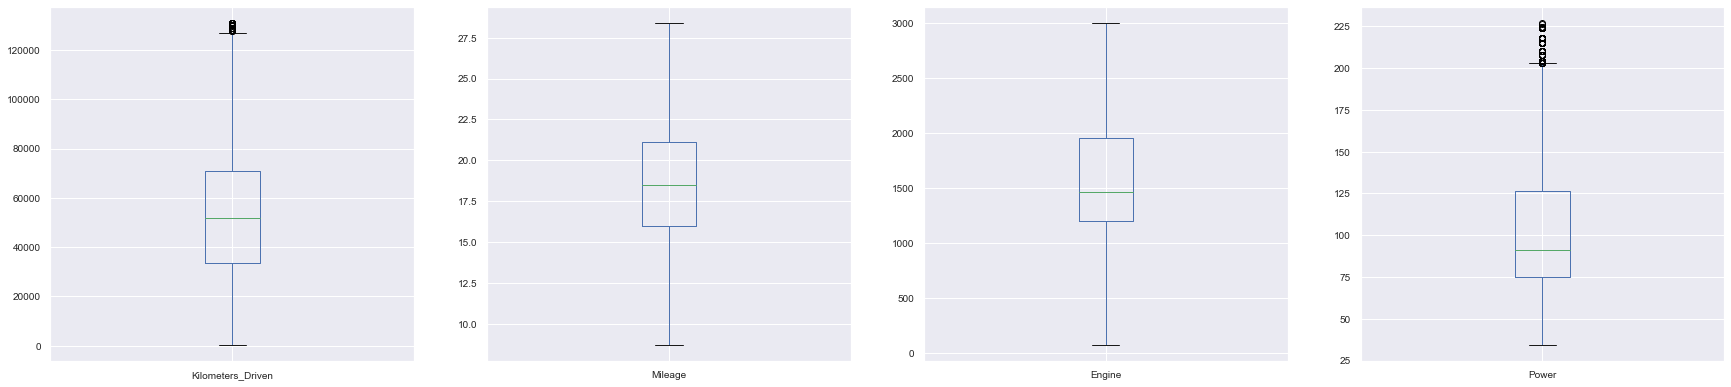

In [105]:
#Box_Plot post outlier removal
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

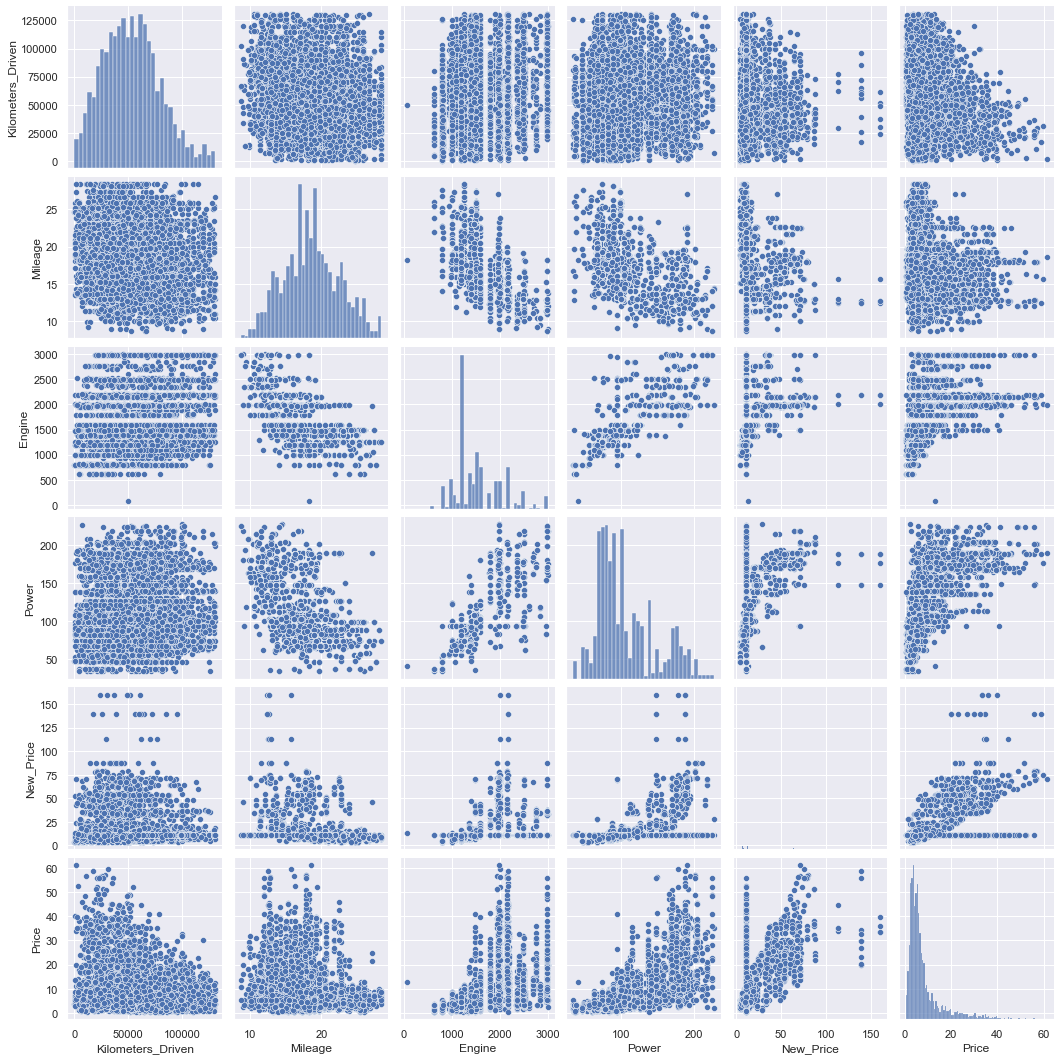

In [106]:
# Scatter plot matrix using seaborn library
data_continous['New_Price']=df3.New_Price
data_continous['Price']=df3.Price
sns.pairplot(data_continous)
plt.show()

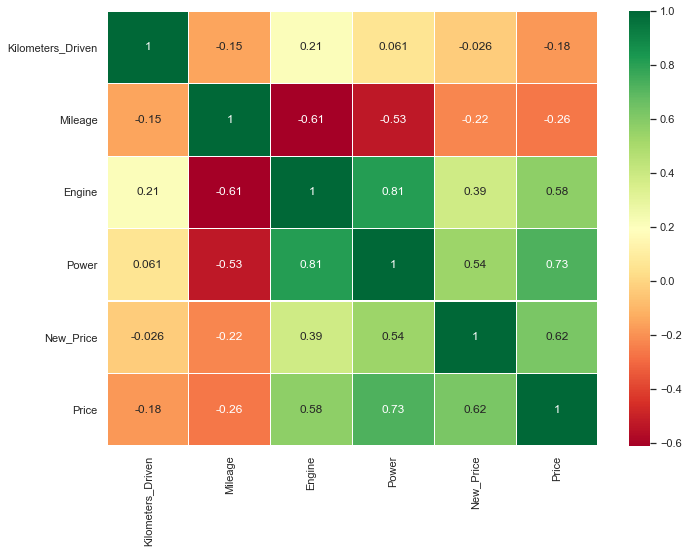

In [107]:
sns.heatmap(data_continous.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

After removing the outliers, the data looks better correlated. 

In [108]:
df3.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,4.74,1.75,MARUTI,WAGON
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,18.32,12.50,HYUNDAI,CRETA
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,HONDA,Others
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.26,6.00,MARUTI,Others
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,AUDI,Others


In [109]:
df3

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,4.74,1.75,MARUTI,WAGON
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,18.32,12.50,HYUNDAI,CRETA
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,HONDA,Others
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.26,6.00,MARUTI,Others
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,AUDI,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,11.30,3.65,VOLKSWAGEN,VENTO
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,10.83,6.51,VOLKSWAGEN,POLO
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.48,4.25,Others,Others
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,10.15,4.50,VOLKSWAGEN,POLO


In [110]:
# can add custom labels tying to see binning can be utilised or not. Binnig the year data gives .90 R2. so will keep it 
#without binning. 
# conver tht year to int. 
#df3['Year'] = df3["Year"].astype(int)
#df3['Year_Bin'] = pd.cut(
#    df3['Year'], [-np.inf, 2005, 2010, 2015, np.inf], 
#    labels = ["Before 2005'", "2005 to 2010", "2010 to 2015'", "after 2015'"]
#)
#df3.drop(['Year'], axis=1, inplace=True)
#df3['Year_Bin'].value_counts(dropna=False)

## Variable Transformation

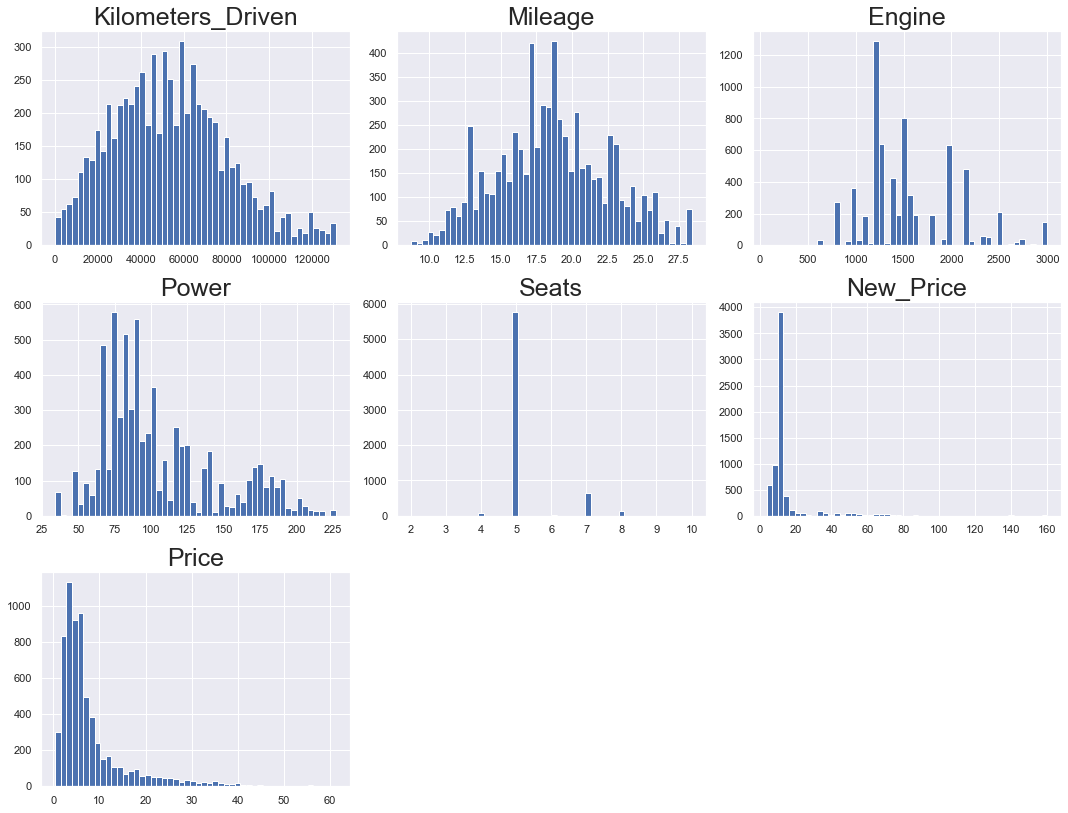

In [111]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df3.select_dtypes(include=np.number).columns 
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df3[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

In [112]:
# creating a copy of the dataframe
df4 = df3.copy()

# removing price
dist_cols.remove("Price")




In [113]:
dist_cols

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']

In [114]:
# using log transforms on some columns

for col in dist_cols:
    df4[col + "_log"] = np.log(df4[col] + 1)

# dropping the original columns
df4.drop(dist_cols, axis=1, inplace=True)
df4.drop(['Seats_log'],axis=1, inplace=True) # Dropping seats_log since it not going to  impact cuz most of the values are 5
df4.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Price,Brand,Model,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,New_Price_log
0,Mumbai,2010,CNG,Manual,First,1.75,MARUTI,WAGON,11.184435,3.317816,6.906755,4.080246,1.747459
1,Pune,2015,Diesel,Manual,First,12.50,HYUNDAI,CRETA,10.621352,3.028683,7.367077,4.845761,2.961141
2,Chennai,2011,Petrol,Manual,First,4.50,HONDA,Others,10.736418,2.954910,7.090077,4.496471,2.262804
3,Chennai,2012,Diesel,Manual,First,6.00,MARUTI,Others,11.373675,3.080533,7.130099,4.497139,2.506342
4,Coimbatore,2013,Diesel,Automatic,Second,17.74,AUDI,Others,10.613271,2.785011,7.585281,4.954418,3.991573


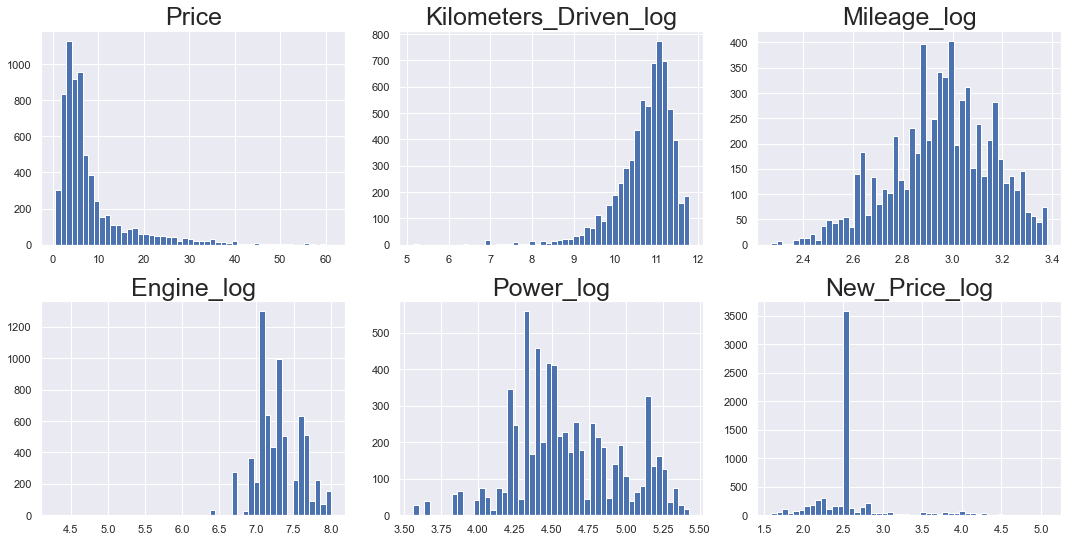

In [115]:
# creating a list of columns
dist_cols = [
    item for item in df4.select_dtypes(include=np.number).columns 
]

# let's plot histogram of all columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df4[dist_cols[i]], bins=50)
    # sns.histplot(data=df4, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* The columns are still skewed, but not as heavily as before.

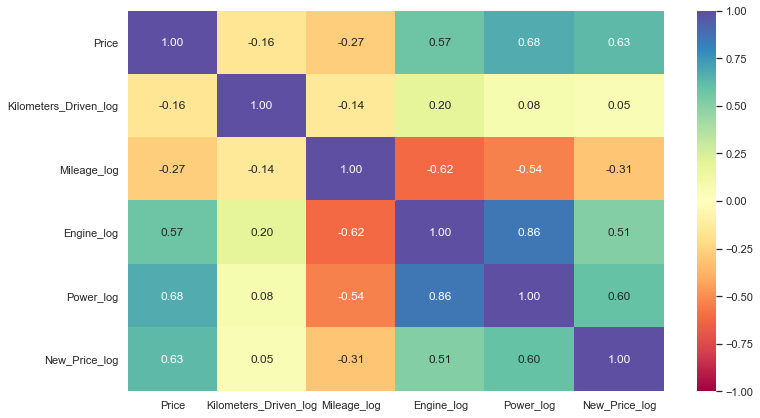

In [116]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df4[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Looks like Engine and power are correlated well but not that well. So will keep the data as it is. 

In [117]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6688 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6688 non-null   object 
 1   Year                   6688 non-null   object 
 2   Fuel_Type              6688 non-null   object 
 3   Transmission           6688 non-null   object 
 4   Owner_Type             6688 non-null   object 
 5   Price                  6688 non-null   float64
 6   Brand                  6688 non-null   object 
 7   Model                  6688 non-null   object 
 8   Kilometers_Driven_log  6688 non-null   float64
 9   Mileage_log            6688 non-null   float64
 10  Engine_log             6688 non-null   float64
 11  Power_log              6688 non-null   float64
 12  New_Price_log          6688 non-null   float64
dtypes: float64(6), object(7)
memory usage: 731.5+ KB


## Model Building

### Define dependent variable

In [118]:
ind_vars = df4.drop(["Price"], axis=1) # Dropping Model column for better R2 value
dep_var = np.log1p(df4.Price) # using log value so that MAE goes down from 2.x to 0.15 
#dep_var = df4[["Price"]]

In [119]:
ind_vars

,Location,Year,Fuel_Type,Transmission,Owner_Type,Brand,Model,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,New_Price_log
0,Mumbai,2010,CNG,Manual,First,MARUTI,WAGON,11.184435,3.317816,6.906755,4.080246,1.747459
1,Pune,2015,Diesel,Manual,First,HYUNDAI,CRETA,10.621352,3.028683,7.367077,4.845761,2.961141
2,Chennai,2011,Petrol,Manual,First,HONDA,Others,10.736418,2.954910,7.090077,4.496471,2.262804
3,Chennai,2012,Diesel,Manual,First,MARUTI,Others,11.373675,3.080533,7.130099,4.497139,2.506342
4,Coimbatore,2013,Diesel,Automatic,Second,AUDI,Others,10.613271,2.785011,7.585281,4.954418,3.991573
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,Diesel,Manual,First,VOLKSWAGEN,VENTO,11.401010,3.069912,7.377134,4.650144,2.509599
7249,Mumbai,2015,Petrol,Automatic,First,VOLKSWAGEN,POLO,10.985310,2.901971,7.088409,4.650144,2.470639
7250,Kolkata,2012,Diesel,Manual,First,Others,Others,10.239996,3.181382,7.287561,4.160444,2.349469
7251,Pune,2013,Petrol,Automatic,Third,VOLKSWAGEN,POLO,10.864044,2.901422,7.088409,4.650144,2.411439


In [120]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_CHEVROLET,Brand_FORD,Brand_HONDA,Brand_HYUNDAI,Brand_MAHINDRA,Brand_MARUTI,Brand_MERCEDES-BENZ,Brand_Others,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Model_ALTO,Model_AMAZE,Model_CITY,Model_CRETA,Model_E-CLASS,Model_ECOSPORT,Model_FIGO,Model_FORTUNER,Model_GRAND,Model_I10,Model_I20,Model_INNOVA,Model_NEW,Model_Others,Model_POLO,Model_SWIFT,Model_VENTO,Model_VERNA,Model_WAGON,Model_XUV500
0,11.184435,3.317816,6.906755,4.080246,1.747459,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10.621352,3.028683,7.367077,4.845761,2.961141,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.736418,2.954910,7.090077,4.496471,2.262804,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,11.373675,3.080533,7.130099,4.497139,2.506342,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,10.613271,2.785011,7.585281,4.954418,3.991573,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [121]:
ind_vars_num.shape

(6688, 79)

# Split the data into train and test

In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [123]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4681
Number of rows in train data = 2007


Fitting Linear Model

In [124]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [125]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Kilometers_Driven_log,-0.075673
Mileage_log,-0.132787
Engine_log,0.211961
Power_log,0.610005
New_Price_log,0.162325
Location_Bangalore,0.109422
Location_Chennai,0.002741
Location_Coimbatore,0.097109
Location_Delhi,-0.053882
Location_Hyderabad,0.081010


### Coefficient interpretations

* Coefficients of log of *Power*, log Engine , log of *New Price*, some of the *Location* columns, some of the *Brand* columns, some of the *Model* columns, some of "Fuel Type", "Owner Type". are positive.
    - Increase in these will lead to an increase in price of the car.


* Coefficients of *Kilometers driven log*, logs of mileage, some of the *locations*, , some of the *Brand* columns, some of the *Location* columns, some of "Fuel Type", "Owner Type" are negative.
    - Increase in these will lead to a decrease in price of the car.

### Model performance check
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate adjusted $R^2$.
* We will create a function that will print out all the above metrics in one go

In [126]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [127]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.203608  0.146163  0.908127      0.906549


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.206881  0.146883  0.905276      0.901393


**Observations**

- [Not using log value on Price]The train and test $R^2$ are 0.83 and 0.81, indicating that the model explains 83% and 81% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- The train and test $R^2$ are 0.91 and 0.90, indicating that the model explains 91% and 90% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is just fit and can be used for the prediction. 

- MAE indicates that our current model is able to predict car price within a mean error of 0.14 on the test set.

- The overall performance looks okay.

- Still a model tuning needs to be performed. RMSE and MAE in the range is exact reflection of the price units. So need to revist the model feature engineering parts. 

## Results

* For this project, i have only used a single model in order to predict the price of the used cars. Linear Regression Model. 
* It has shown a good performance in such a big dataset and has performed consistently throughout the training and testing process. The results are better with a 91 % of accuracy in its predictions
* This information can be give valuable views for Cars4U when trying to understand how to estimate the value of a car and more importantly, the key factors that determine its pricing. 

* As from the Explorartory data analysis, the owner type of the vehicle is by far the main factor when calculating the price, followed by transmission type and region preferences. 
* It is evident from the EDA, that the used car sales is increasing in the tier-2 cities with Coimbatore toping the list and there seems to be decline in the number from the tier 1 cities. 
* Also, economical cars with better mileage are priced lower and not a big preference from the user as this segment is not popular amoung the customers.  

### Business Recommendation:

* Car4U can use this model model to predict the price of the used car with 91 % percent accuracy. 
* THe company has to focus more into the tier 2 city, the recent trend of sales comes from the tier 2 cities. 
* Manual cars are sold most but the automatic gear cars are sold at the higher price. The trend is that automatic cars are bought lately by many customer. So Car4U, should focus in this type of cars mode. 
* First hand vehicle are sold and are preferred choice by the customers. 
* Most preferred brand is Maruthi, followed by Hyundai, honda and tyoto
* Swift model is sold more than any other model of the car. 
* Cars made after 2012 has positive impact price but cars older than 2011 give decrease in price. 
* Model predicts the diesel cars sells at better price in that category
* Car4U should consider Transmission , Fuel type, Owner Type and Year for the better valuation to price the car. 


## Forward Feature Selection 

**Forward feature selection starts with an empty model and adds in variables one by one.**

* In each forward step, you add the one variable that gives the single best improvement to your model.
* We'll use forward feature selection on all the variables.

In [128]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    2.6s finished

[2021-05-29 12:13:20] Features: 1/79 -- score: 0.5505536930582731[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    0.1s finished

[2021-05-29 12:13:21] Features: 2/79 -- score: 0.6063149995183584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    0.1s finished

[2021-05-29 12:13:21] Features: 3/79 -- score: 0.676594331256479[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  76 out of

[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.4s finished

[2021-05-29 12:13:34] Features: 28/79 -- score: 0.8835186773476199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.7s finished

[2021-05-29 12:13:35] Features: 29/79 -- score: 0.8850469222515651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished

[2021-05-29 12:13:36] Features: 30/79 -- score: 0.8865048564426514[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  49 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.8s finished

[2021-05-29 12:13:37] Features: 31/79 -- score: 0.887801279560516[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 con

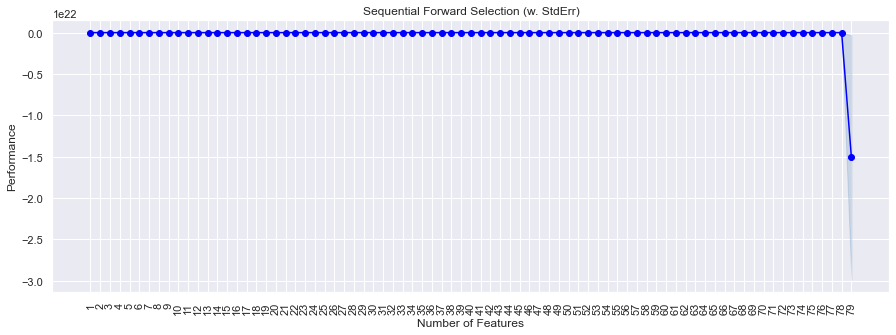

In [129]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [130]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.2s finished

[2021-05-29 12:14:22] Features: 1/30 -- score: 0.5505536930582731[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    0.2s finished

[2021-05-29 12:14:22] Features: 2/30 -- score: 0.6063149995183584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    0.3s finished

[2021-05-29 12:14:22] Features: 3/30 -- score: 0.676594331256479[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  76 out of

[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.7s finished

[2021-05-29 12:14:36] Features: 29/30 -- score: 0.8850469222515651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished

[2021-05-29 12:14:37] Features: 30/30 -- score: 0.8865048564426514

In [131]:
# Let us select features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 3, 4, 5, 7, 9, 12, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 40, 41, 46, 48, 49, 52, 55, 56, 58, 70, 76]


In [132]:
x_train.columns[feat_cols]

Index(['Kilometers_Driven_log', 'Power_log', 'New_Price_log',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Hyderabad',
       'Location_Kolkata', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Brand_CHEVROLET', 'Brand_HONDA',
       'Brand_HYUNDAI', 'Brand_MERCEDES-BENZ', 'Brand_SKODA', 'Brand_TATA',
       'Brand_VOLKSWAGEN', 'Model_INNOVA', 'Model_VERNA'],
      dtype='object')

In [133]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [134]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

In [135]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                       Coefficients
Kilometers_Driven_log     -0.070744
Power_log                  0.852480
New_Price_log              0.217878
Location_Bangalore         0.148707
Location_Coimbatore        0.130834
Location_Hyderabad         0.111497
Location_Kolkata          -0.129826
Year_2008                  0.201477
Year_2009                  0.243821
Year_2010                  0.325858
Year_2011                  0.401553
Year_2012                  0.546849
Year_2013                  0.607059
Year_2014                  0.724151
Year_2015                  0.802108
Year_2016                  0.873662
Year_2017                  0.939614
Year_2018                  1.001038
Year_2019                  0.973857
Fuel_Type_Petrol          -0.169926
Transmission_Manual       -0.195450
Brand_CHEVROLET           -0.299268
Brand_HONDA               -0.149348
Brand_HYUNDAI             -0.091973
Brand_MERCEDES-BENZ        0.322887
Brand_SKODA               -0.191137
Brand_TATA                -0

In [136]:
# model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model2, x_train_final, y_train))

# model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model2, x_test_final, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.224953  0.163157  0.887854       0.88713


Test Performance

      RMSE      MAE      R^2  Adjusted R^2
0  0.22594  0.16324  0.88702      0.885304


**Observations**

* The new model (*lin_reg_model2*) uses less than half the number of features as the previous model (*lin_reg_model*).
* The performance of the new model, however, is close to our previous model.

### below is just add on to see which factors most for the prediction. 

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

scores =[]
forest = RandomForestRegressor(n_estimators=20, random_state=0)
acc = cross_val_score(forest, x_train, y_train, scoring='r2', cv=5)
scores.append(round(acc.mean()*100,2))

In [138]:
results = pd.DataFrame({'Metrics': ['R2'], 'Accuracy': scores})
results

,Metrics,Accuracy
0,R2,89.2


In [139]:
param_grid = {
    'bootstrap': ['True', 'False'],
    'max_depth': [80,90,100],
    'max_features': [2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators': [100,200,300]
}

In [140]:


forest = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=forest,param_grid=param_grid,cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  3.5min finished


{'bootstrap': 'True',
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [141]:
scores2 =[]
best_grid = grid_search.best_estimator_
acc2 = cross_val_score(best_grid,x_train, y_train, scoring='r2',cv=5)
scores2.append(round(acc2.mean()*100,2))

In [142]:
results = pd.DataFrame({'Metrics': ['R2'],
                         'Accuracy':scores,
                         'Accuracy Tuned Param':scores2})
results

,Metrics,Accuracy,Accuracy Tuned Param
0,R2,89.2,82.32


In [143]:
name=[]
importance=[]

for nam,imp in zip(ind_vars, best_grid.feature_importances_):
    name.append(nam)
    importance.append(round(imp*100,2))

In [144]:
features = pd.DataFrame ({'Features': name, 'Importance (%)': importance})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
3,Transmission,15.89
2,Fuel_Type,15.32
4,Owner_Type,9.43
1,Year,4.40
0,Location,3.24
7,Kilometers_Driven_log,0.90
11,New_Price_log,0.32
10,Power_log,0.24
5,Brand,0.20
6,Model,0.14
